In [ ]:
##installing libraries required for Analysis.
 
 
!pip install geopandas
!pip install contextily
!pip install folium

In [ ]:
#####################################################Function to Plot a Bargraph##########################################################################
 
import numpy as np 
import matplotlib.pyplot as plt   
def PlotBarGraphR(Plot_Lables,Plot_Values,xlab,ylab,title):  
    fig = plt.figure(figsize = (10, 5)) 
      
    # creating the bar plot 
 
    plt.bar(Plot_Lables, Plot_Values, color ='Blue',width = 0.4) 
      
    plt.xlabel("Algorithm") 
    plt.ylabel("Outlier Detection") 
    plt.title("Clustering Efficiency on the basis of outlier detection") 
    plt.show()

In [ ]:
#####################################Function to plot the boundry on the map############################################################# 
 
def makemap(df,cluster_column):
  m=folium.Map(location=[df.longitude.mean(),df.latitude.mean()],zoom_start=10,tiles='stamen toner')
  for _, row in df.iterrows():
 
      
      cluster_colour = cols[row[cluster_column]]
 
      folium.CircleMarker(
          location= [row.longitude,row.latitude],
          radius=0.5,
          popup= row.crimeActivity,
          color=cluster_colour,
          fill=True,
          fill_color=cluster_colour
      ).add_to(m)
  return m

In [ ]:
################################################Importing all necessary Library########################################################### 
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import geopandas as gpd
from tqdm import tqdm
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from kmodes.kmodes import KModes
from ipywidgets import interactive
 
from collections import defaultdict
import folium
import re
 
 
cols = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4',
        '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', 
        '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', 
        '#000075', '#808080']*10

# **Data Wrangling**

In [ ]:
#loading Driver
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Loading shape file
d=gpd.read_file("/content/gdrive/My Drive/SIH20/Delhi/Districts.shp")
d.head()
d.to_crs(epsg=4326)  #making our CRS suitable for Working

OBJECTID  ...                                           geometry
0        99  ...  POLYGON ((77.26042 28.62286, 77.25705 28.62268...
1       167  ...  POLYGON ((77.30482 28.57678, 77.29593 28.58194...
2       417  ...  POLYGON ((77.25066 28.66244, 77.25021 28.66266...
3       413  ...  POLYGON ((77.21434 28.78352, 77.21329 28.78031...
4       420  ...  POLYGON ((77.17093 28.66833, 77.16689 28.67303...
5       411  ...  POLYGON ((77.26042 28.62286, 77.26267 28.62114...
6       544  ...  POLYGON ((77.26455 28.60747, 77.26558 28.60738...
7       550  ...  POLYGON ((77.18253 28.64817, 77.18380 28.64638...
8       613  ...  POLYGON ((77.17093 28.66833, 77.17072 28.66817...

[9 rows x 4 columns]

# **Exploratory Data Analysis**

In [ ]:
df=pd.read_csv("/content/gdrive/My Drive/SIH20/Dataset/dummydataset.csv")
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [ ]:
df

latitude  longitude crimeActivity
0    77.195548  28.653464   Eve Teasing
1    77.213640  28.649382   Eve Teasing
2    77.236058  28.635862   Eve Teasing
3    77.237606  28.637426   Eve Teasing
4    77.200659  28.657260   Eve Teasing
..         ...        ...           ...
895  76.961917  28.683860   Eve Teasing
896  77.074014  28.637758   Eve Teasing
897  76.980991  28.681441   Eve Teasing
898  77.021966  28.645468   Eve Teasing
899  77.048378  28.627944   Eve Teasing

[900 rows x 3 columns]

In [ ]:
#is duplicate if present remove else do nothing
df.duplicated(subset=['latitude','longitude']).values.any()

False

In [ ]:
df.isna().values.any()

False

In [ ]:
#crime located locations on Map
 
import folium
m=folium.Map(location=[df.longitude.mean(),df.latitude.mean()],zoom_start=10,tiles='stamen toner')
for _,row in df.iterrows():
  folium.CircleMarker(location=[row.longitude,row.latitude],radius=0.5,popup=row.crimeActivity,color='#1787FE',fill=True,fill_color='#1787FE').add_to(m)
m

# **Analytics **

In [ ]:
#making clusters
from sklearn.datasets import make_blobs
X_blobs,_ = make_blobs(n_samples=1000,centers=10,n_features=3,cluster_std=0.5,random_state=4)

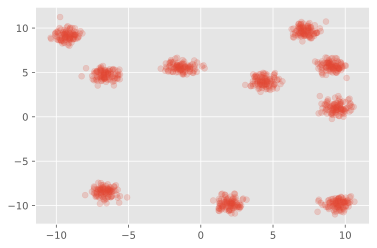

In [ ]:
#clusters groups
import matplotlib as plt
plt.pyplot.scatter(X_blobs[:,0],X_blobs[:,1],alpha=0.2)

In [ ]:
#clutering via a Kmeans Algorithm
from sklearn.cluster import KMeans
model=KMeans(n_clusters=4,random_state=17).fit(X_blobs)
class_predictions=model.predict(X_blobs)

In [ ]:
class_predictions

array([1, 2, 0, 2, 0, 2, 2, 3, 2, 0, 0, 2, 1, 1, 3, 2, 0, 2, 3, 1, 2, 1,
       2, 0, 2, 1, 0, 1, 0, 2, 3, 1, 0, 0, 0, 1, 1, 3, 1, 3, 3, 2, 2, 1,
       1, 2, 2, 2, 0, 3, 2, 2, 0, 1, 1, 1, 1, 2, 2, 0, 2, 0, 3, 1, 2, 2,
       3, 2, 1, 0, 2, 2, 0, 1, 2, 1, 2, 1, 1, 1, 2, 0, 3, 0, 1, 0, 0, 1,
       0, 1, 2, 1, 3, 1, 0, 3, 1, 2, 0, 1, 0, 1, 3, 0, 2, 3, 3, 0, 0, 3,
       1, 2, 1, 0, 1, 1, 1, 0, 2, 3, 0, 0, 1, 0, 1, 3, 0, 2, 1, 1, 2, 1,
       3, 1, 1, 3, 1, 1, 2, 3, 3, 2, 2, 1, 0, 1, 2, 0, 2, 2, 1, 1, 1, 0,
       2, 2, 1, 0, 0, 2, 1, 1, 1, 1, 3, 0, 1, 2, 3, 0, 1, 2, 1, 2, 1, 2,
       0, 2, 2, 1, 3, 3, 3, 2, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 1, 2,
       1, 1, 3, 0, 1, 2, 2, 0, 2, 2, 0, 0, 1, 2, 3, 0, 0, 0, 1, 3, 1, 3,
       1, 2, 2, 3, 0, 2, 2, 2, 1, 0, 1, 3, 2, 1, 2, 2, 1, 1, 2, 3, 0, 0,
       2, 1, 3, 3, 1, 2, 2, 2, 2, 2, 3, 1, 2, 1, 3, 0, 1, 0, 0, 0, 3, 1,
       0, 3, 0, 0, 3, 3, 3, 3, 1, 3, 1, 3, 2, 0, 0, 3, 2, 0, 2, 2, 3, 3,
       1, 1, 0, 0, 2, 3, 2, 2, 1, 1, 2, 2, 1, 3, 1,

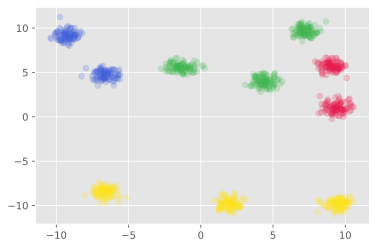

In [ ]:
unique_clusters=np.unique(class_predictions)
cols=['#e6194b','#3cb44b','#ffe119','#4363d8']
for unique_cluster in unique_clusters:
  X=X_blobs[class_predictions==unique_cluster]
  plt.pyplot.scatter(X[:,0],X[:,1],alpha=0.2,c=cols[unique_cluster])

There are four unique clusters formed when kmeans clustering alogorithm is applied it can be clustered as the crime activity in the location. 

In [ ]:
data = defaultdict(dict)
for x in range(1,21):
    model = KMeans(n_clusters=4, random_state=17, 
                   max_iter=x, n_init=1).fit(X_blobs)
    
    data[x]['class_predictions'] = model.predict(X_blobs)
    data[x]['centroids'] = model.cluster_centers_
    data[x]['unique_classes'] = np.unique(class_predictions)

In [ ]:
import matplotlib.pyplot as plt
#function to compute the centroid,clusters at a particular instance of iteration.
def f(x):
    class_predictions = data[x]['class_predictions']
    centroids = data[x]['centroids']
    unique_classes = data[x]['unique_classes']

    for unique_class in unique_classes:
            plt.scatter(X_blobs[class_predictions==unique_class][:,0], 
                        X_blobs[class_predictions==unique_class][:,1], 
                        alpha=0.3, c=cols[unique_class])
    plt.scatter(centroids[:,0], centroids[:,1], s=200, c='#000000', marker='v')
    plt.ylim([-15,15]); plt.xlim([-15,15])
    plt.title('How K-Means Clusters')

interactive_plot = interactive(f, x=(1, 21))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=11, description='x', max=21, min=1), Output(layout=Layout(height='350px'…

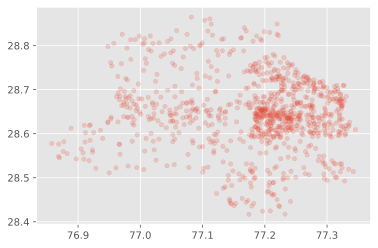

In [ ]:
#Taking idea of Distribution of crime density
import numpy as np

X=np.array(df[['latitude','longitude']],dtype='float64')
plt.scatter(X[:,0],X[:,1],alpha=0.2,s=20)

In [ ]:

v_kmeans=silhouette_score(X_blobs,class_predictions)

ValueError: ignored

**KModes**


In [ ]:

m=makemap(df,'cluster_kmodes')
v_k_modes=silhouette_score(X, class_predictions)
m.save('kmeans.html')

KeyError: ignored

In [ ]:
m

# **Supervised Learning Approch**

Here, we Analysed the dataset via 3 diffrent approach:


1.   SVM(Support Vector Machine).

2.   Decision Tree Classifier.

3.   GaussianNB Classifier.




In [ ]:
#Loading of a model.
import numpy as np
import pandas as pd
 
X = np.array(df[['longitude','latitude']], dtype ='float64')    #Features
df['crimeActivity_Classification_no.'] = pd.factorize(df.crimeActivity)[0] #Factorizing Labels
Y= np.array(df[['crimeActivity_Classification_no.']], dtype = 'int')   #Labels

In [ ]:
#splitting of training and testing data.
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0,test_size=0.33)

In [ ]:
Accuracy_Supervised_Approach=[]

**Support Vector Machine**

In [ ]:
# Training a SVM 
from sklearn import svm
clf = svm.SVC(kernel="linear")
clf.fit(X_train,Y_train)
 
 
# accuracy on X_test 
accuracy = clf.score(X_test, Y_test) 
print ('Accuracy  '+str(accuracy)) 
 
Accuracy_Supervised_Approach.append(accuracy) 
# creating a confusion matrix 
clf_predictions = clf.predict(X_test)  
cm = confusion_matrix(Y_test, clf_predictions)

Accuracy  0.42424242424242425


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel="rbf")
clf.fit(X_train,Y_train)
 
 
# accuracy on X_test 
accuracy = clf.score(X_test, Y_test) 
print ('Accuracy  '+str(accuracy)) 
  
# creating a confusion matrix 
clf_predictions = clf.predict(X_test)  
cm = confusion_matrix(Y_test, clf_predictions)

Accuracy  0.3468013468013468


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel="sigmoid")
clf.fit(X_train,Y_train)
 
 
# accuracy on X_test 
accuracy = clf.score(X_test, Y_test) 
print ('Accuracy  '+str(accuracy)) 
  
# creating a confusion matrix 
clf_predictions = clf.predict(X_test)  
cm = confusion_matrix(Y_test, clf_predictions)

Accuracy  0.3468013468013468


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**DecisionTreeClassifier**

In [ ]:
# Training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 5,min_samples_split=2).fit(X_train, Y_train) 
dtree_predictions = dtree_model.predict(X_test) 
 
#Accuracy on X_test.
accuracy = dtree_model.score(X_test, Y_test)
print ('Accuracy  '+str(accuracy)) 
Accuracy_Supervised_Approach.append(accuracy)
  
# creating a confusion matrix 
cm = confusion_matrix(Y_test, dtree_predictions)

Accuracy  0.9090909090909091


**GaussianNBClassifier**

In [ ]:
# training a Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, Y_train) 
gnb_predictions = gnb.predict(X_test) 
  
# accuracy on X_test 
accuracy = gnb.score(X_test, Y_test) 
print ('Accuracy  '+str(accuracy)) 
Accuracy_Supervised_Approach.append(accuracy)
# creating a confusion matrix 
cm = confusion_matrix(Y_test, gnb_predictions)

Accuracy  0.7171717171717171


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Unsupervised Learning Approach

In this approch we used the concept of clustering with diffrent methodology:


1.   K-Means 
2.   DBSCAN
3.   Gaussian Mixture Algorithm.



**K-Means**

In [ ]:
from sklearn.cluster import KMeans
K_Means= KMeans (n_clusters=4,random_state=0).fit(X)
class_predictions=K_Means.labels_
df['cluster_kmeans']=class_predictions

In [ ]:
m=makemap(df,'cluster_kmeans')
m

In [ ]:
v_kmeans=silhouette_score(X,class_predictions)
v_kmeans

0.42082900837888676

 **DBSCAN**

In [ ]:
model=DBSCAN(eps=0.1,min_samples=4).fit(X)
class_predictions=model.labels_
df['cluster_DBSCAN']=class_predictions

In [ ]:
m=makemap(df,'cluster_DBSCAN')
m

In [ ]:
vDBSCAN=silhouette_score

# **Gaussian Mixture**

In [ ]:
from sklearn.mixture import GaussianMixture 
gmm = GaussianMixture(n_components = 4) 
 
gmm.fit(X) 
   
labels = gmm.predict(X) 
df['cluster_Gaussian']= labels
 
m=makemap(df,'cluster_Gaussian')
m

In [ ]:
v_Gaussian_Mixture=silhouette_score(X,labels)
v_Gaussian_Mixture

0.4426911158760551

In [ ]:
plotnames=['kmeans','DBSCAN','kmodes','Gaussian Mixture']

In [ ]:
plotbar=[]
plotbar.append(v_kmeans)
 
plotbar.append(vDBSCAN)
plotbar.append(v_Gaussian_Mixture)

NameError: ignored

In [ ]:
plotbar

[0.42082900837888676]

#  **Clustering Report**

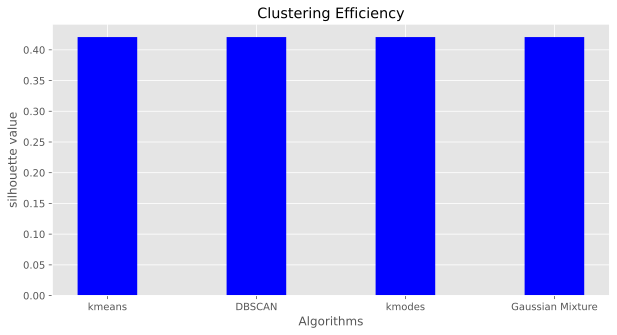

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt   
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(plotnames, plotbar, color ='Blue',  
        width = 0.4) 
  
plt.xlabel("Algorithms") 
plt.ylabel("silhouette value") 
plt.title("Clustering Efficiency") 
plt.show()

**silhouette value** can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.
So, here ranking as per **silhouette value**.

                                            DBSCAN>Kmeans>Kmodes

**Outlier Detection**


# **Classification Report**

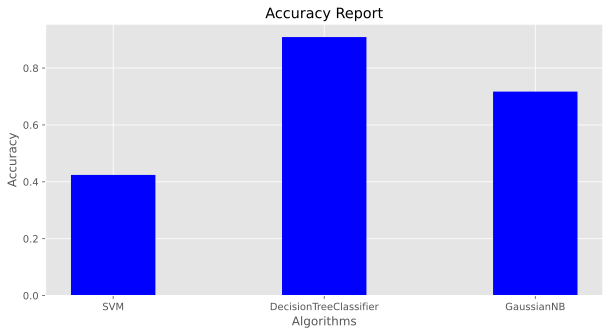

In [ ]:
PlotBarGraphR(['SVM','DecisionTreeClassifier','GaussianNB'],Accuracy_Supervised_Approach,str('Algorithms'),str('Accuracy'),str('Accuracy Report'))

# **Conclusion**

Here from the results it is clear that 